In [34]:
# Realizar download do arquivo no link https://archive.ics.uci.edu/static/public/320/student+performance.zip

In [35]:
# importar bibliotecas para análise de dados e do sklearn para classificação
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [36]:
# ler o arquivo csv
df = pd.read_csv('student-mat.csv', sep=';')

Text(0.5, 1.0, 'Correlação entre G1, G2 e G3')

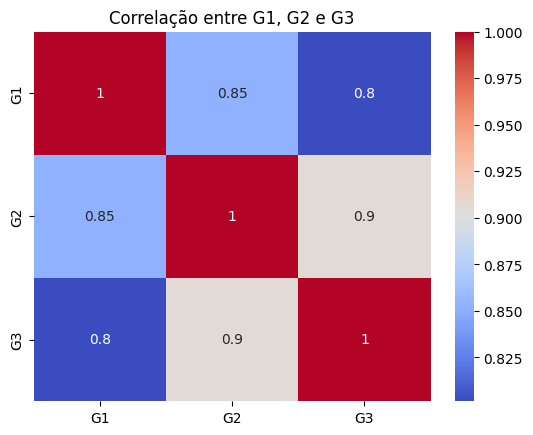

In [37]:
# Calcular a correlação entre G1, G2 e G3 e apresentar o resultado em gráfico de calor
sns.heatmap(df[['G1', 'G2', 'G3']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre G1, G2 e G3')





In [38]:
# analise os resultados e faça uma breve conclusão
# A correlação entre G1, G2 e G3 é alta, o que indica que os alunos que têm um bom desempenho em G1 tendem a ter um bom desempenho em G2 e G3 também. Isso sugere que o desempenho acadêmico dos alunos é consistente ao longo do tempo. Além disso, a correlação entre G2 e G3 é a mais alta, indicando que o desempenho no segundo período está fortemente relacionado ao desempenho no terceiro período.
# Isso pode indicar que os alunos que se saem bem em G2 têm mais chances de se sair bem em G3, o que pode ser útil para prever o desempenho futuro dos alunos com base em seu desempenho anterior.

In [39]:
# Filtrar apenas sex = 'M'
df_m = df[df['sex'] == 'F']
df_m.G3.mean()

np.float64(9.966346153846153)

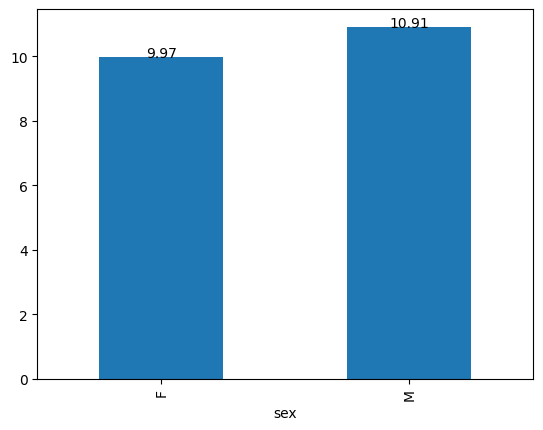

In [40]:
# Calcular a média da coluna G3 e agrupar por gênero (sex) apresentando em gráfico de barras
# Adicionar valor em cada barra

bar_plot = df.groupby('sex')['G3'].mean().plot(kind='bar')

for index, value in enumerate(df.groupby('sex')['G3'].mean()):
    bar_plot.text(index, value, round(value, 2), ha='center')

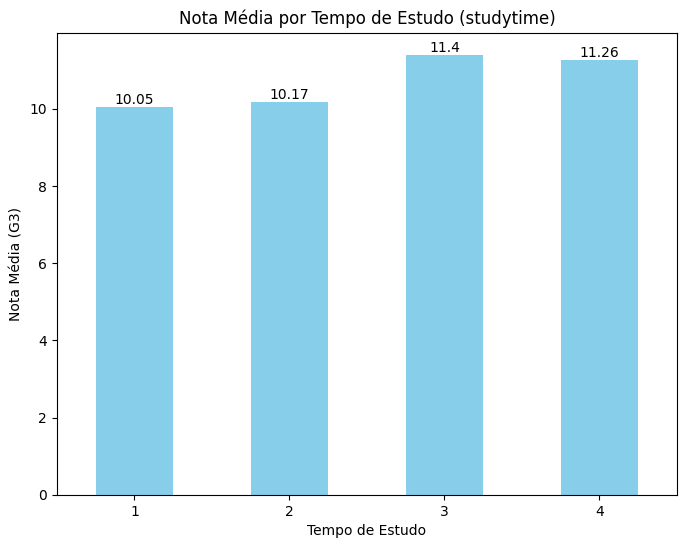

In [41]:
# Nota média por tempo de estudo (studytime)
# Adicionar valor em cada barra

# Agrupar por 'studytime' e calcular a média de 'G3'
studytime_mean = df.groupby('studytime')['G3'].mean()

# Criar o gráfico de barras
bar_plot = studytime_mean.plot(kind='bar', color='skyblue', figsize=(8, 6))

# Adicionar valores em cada barra
for index, value in enumerate(studytime_mean):
    bar_plot.text(index, value, round(value, 2), ha='center', va='bottom')

# Configurar título e rótulos
plt.title('Nota Média por Tempo de Estudo (studytime)')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Nota Média (G3)')
plt.xticks(rotation=0)
plt.show()

In [42]:
# Crie uma lista com as colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

categorical_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [44]:
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [45]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [46]:
df_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [47]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Separar as features (X) e o alvo (y)
X = df.drop(columns=['G3'])  # Remover a coluna G3
y = df['G3']  # Variável alvo

# Aplicar o mutual_info_classif para calcular a importância das features
mutual_info = mutual_info_classif(X, y, random_state=42)

# Criar um DataFrame para visualizar a importância das features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': mutual_info
}).sort_values(by='Score', ascending=False)

# Exibir as features mais importantes
print(feature_scores)

# Selecionar as K melhores features (opcional)
k_best = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = k_best.fit_transform(X, y)

# Exibir as features selecionadas
selected_features = X.columns[k_best.get_support()]
print("Features selecionadas:", selected_features.tolist())

              Feature     Score
14                 G2  1.385437
13                 G1  0.743500
42       schoolsup_no  0.237862
53         higher_yes  0.212542
12           absences  0.194671
3          traveltime  0.174447
15          school_GP  0.167402
5            failures  0.162133
56        romantic_no  0.157449
40    guardian_mother  0.138692
48      activities_no  0.118258
45         famsup_yes  0.107193
21        famsize_GT3  0.105450
55       internet_yes  0.104830
28      Mjob_services  0.095713
51        nursery_yes  0.086063
1                Medu  0.079236
32         Fjob_other  0.074376
39    guardian_father  0.069628
43      schoolsup_yes  0.064765
9                Dalc  0.062973
18              sex_M  0.062422
37       reason_other  0.060333
27         Mjob_other  0.055301
46            paid_no  0.050969
38  reason_reputation  0.048731
10               Walc  0.047351
24          Pstatus_T  0.046676
35      reason_course  0.045312
19          address_R  0.040592
54      